<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = pd.read_csv('C:/IOD/Data/winequality_merged.csv')

#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
# ANSWER
wine_csv.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
wine_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
wine_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


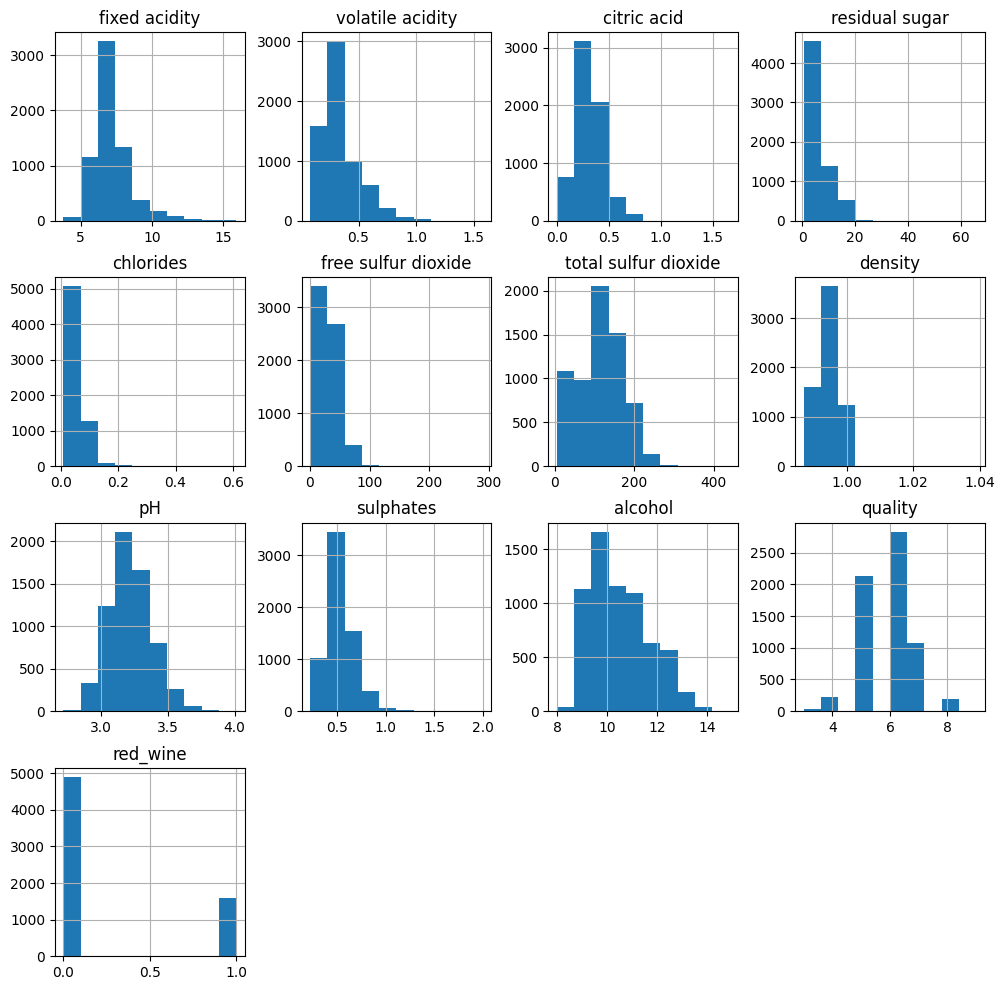

In [6]:
wine_csv.hist(figsize=(12,12))
plt.show()

### 2. Set Target Variable

Create a target variable for wine quality.

In [7]:
# Target Variable
y = wine_csv['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reasoning for the choices you make.

In [8]:
# ANSWER
predictor_columns = [c for c in wine_csv.columns if c != 'quality']
X = pd.DataFrame(wine_csv, columns = predictor_columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


### 4. Using Linear Regression Create a Model and Test Score

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [10]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
# Create a model for Linear Regression
lm = LinearRegression()

In [12]:

# Fit the model with the Training data
lm.fit(X_train,y_train)

LinearRegression()

In [13]:

# Calculate the score (R^2 for Regression) for Training Data
lm.score(X_train,y_train)

0.30294471018673264

In [14]:

# Calculate the score (R^2 for Regression) for Testing Data
lm.score(X_test,y_test)

0.2671574851262548

## Cross validation

In [15]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error,r2_score

In [17]:
# Set up 5-fold cross validation  
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

    # Fit model with training set
    lm.fit(X_train, y_train)
    
    # Make predictions with training and test set
    y_train_pred = lm.predict(X_train)
    y_test_pred = lm.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse_value = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse_value = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_scores.append(train_r2)
    train_rmse.append(train_rmse_value)
    test_scores.append(test_r2)
    test_rmse.append(test_rmse_value)

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'Train R2': train_scores,
    'Train RMSE': train_rmse,
    'Test R2': test_scores,
    'Test RMSE': test_rmse
})

print(metrics_df)

   Fold  Train R2  Train RMSE   Test R2  Test RMSE
0     1  0.302945    0.731841  0.267157   0.735689
1     2  0.296293    0.732482  0.295775   0.732684
2     3  0.292663    0.733464  0.310189   0.728456
3     4  0.294477    0.731187  0.302330   0.738153
4     5  0.298134    0.731824  0.286386   0.736331


In [19]:
# Describe the metrics
metrics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fold,5.0,3.000000,1.581139,1.000000,2.000000,3.000000,4.000000,5.000000
Train R2,5.0,0.296902,0.003945,0.292663,0.294477,0.296293,0.298134,0.302945
Train RMSE,5.0,0.732160,0.000861,0.731187,0.731824,0.731841,0.732482,0.733464
Test R2,5.0,0.292368,0.016582,0.267157,0.286386,0.295775,0.302330,0.310189
Test RMSE,5.0,0.734263,0.003797,0.728456,0.732684,0.735689,0.736331,0.738153


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



